## 主要内容
1. 霍夫检测
2. 轮廓检测
3. 模板匹配算法
4. 模板匹配的不足

In [2]:
#加载库
import numpy as np
import skimage
import matplotlib.pyplot as plt

In [3]:
#霍夫变换

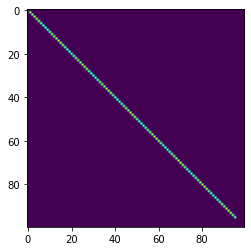

In [4]:
#花一张测试图片
from skimage import draw

img = np.zeros([100,100])
h,w = draw.line(1,1,95,95)
img[h,w] = 1
plt.imshow(img)

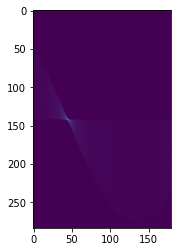

In [5]:
#霍夫变换模块
import skimage.transform as transform
h,theta,d = transform.hough_line(img)
plt.imshow(h)

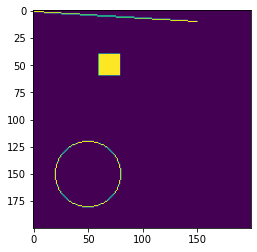

In [6]:
#霍夫圆检测

#画图
img = np.zeros([200,200])

#画线
h,w = draw.line(1,1,10,150)
img[h,w] = 1
#画圆
h,w = draw.circle_perimeter(150,50,30)
img[h,w] = 1
#画一个矩形
img[40:60,60:80] = 1
plt.imshow(img)

1.000000000000004


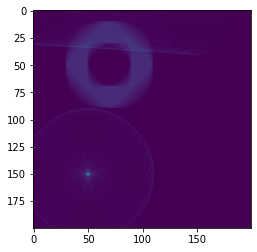

In [7]:
#设定检测的半径范围
radius = np.arange(5,50,5)
#霍夫检测
circle = transform.hough_circle(img,radius)
plt.imshow(circle[5,:,:])
print(np.max(circle[5,:,:]))

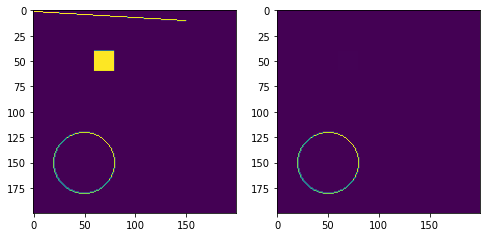

In [8]:
#画出检测的圆
import skimage.feature as feature
r=5
peak = feature.peak_local_max(circle[r,:,:],num_peaks=1)

img2 = img.copy()
cx,cy = draw.circle_perimeter(peak[0][0],peak[0][1],radius[r])
img2[cx,cy] = 255

plt.figure('detect_circle',figsize=(8,8))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(img2)
plt.show()

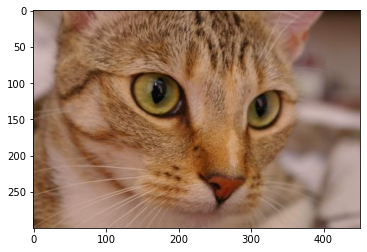

In [9]:
# 模板匹配
import skimage.io as io
img = io.imread('data/cat.jpg')
plt.imshow(img)

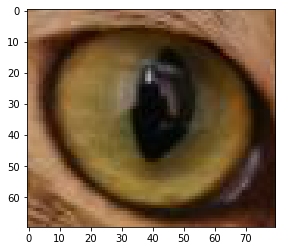

In [10]:
# 制作眼睛模板
template = img[80:150,130:210,:]
plt.imshow(template)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


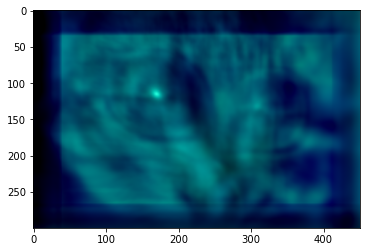

In [11]:
res = skimage.feature.match_template(img,template,pad_input=True,mode='constant',constant_values=0)
plt.imshow(res)

In [12]:
print(np.max(res))

0.9999999999999998


<ipython-input-13-f86260fddcb3>:2: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  h,w = skimage.draw.circle(index[0][0],index[1][0],10)


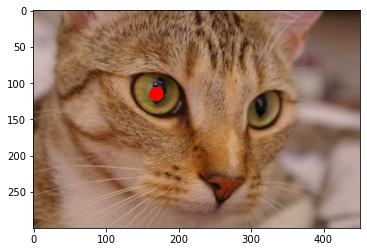

In [13]:
#红点标出猫眼位置

index = np.where(res==np.max(res))
h,w = skimage.draw.circle(index[0][0],index[1][0],10)
skimage.draw.set_color(img,[h,w],[255,0,0])
plt.imshow(img)

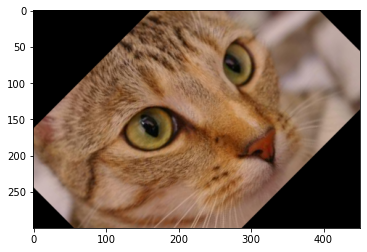

In [14]:
# 旋转后
img = io.imread('data/cat.jpg')

import skimage.transform as transform
img2 = transform.rotate(img,45)
plt.imshow(img2)

In [15]:
res = skimage.feature.match_template(img2,template,pad_input=True,mode='constant',constant_values=0)
print(np.max(res))

0.5871063877765171


<ipython-input-17-55104c542605>:2: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  h,w = skimage.draw.circle(index[0][0],index[1][0],10)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


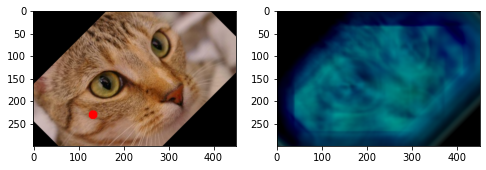

In [17]:
#旋转后匹配效果不佳
index = np.where(res == np.max(res))
h,w = skimage.draw.circle(index[0][0],index[1][0],10)
skimage.draw.set_color(img2,[h,w],[255,0,0])

plt.figure('detected',figsize=(8,8))
plt.subplot(121)
plt.imshow(img2)
plt.subplot(122)
plt.imshow(res)

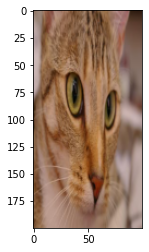

In [18]:
#压缩后
img2 = transform.resize(img,[200,100])
plt.imshow(img2)

In [19]:
res = skimage.feature.match_template(img2,template,pad_input=True,mode='constant',constant_values=0)
print(np.max(res))

0.49925489998180567


In [ ]:
#压缩后匹配结果也不佳
index = np.where(res == np.max(res))
h,w = skimage.draw.circle(index[0][0],index[1][0],5)
skimage.draw.set_color(img2,[h,w],[0,255,0])

plt.figure('detected',figsize=(8,8))
plt.subplot(121)
plt.imshow(img2)
plt.subplot(122)
plt.imshow(res)